<a href="https://colab.research.google.com/github/Kishan-Kumar-Zalavadia/MachineLearning/blob/main/MLWeek9Day2_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Course: CSCE 5215 Machine Learning
## Professor: Zeenat Tariq
## Activity 9

# Ensemble Models

Ensemble models is a machine learning approach to combine multiple other models in the prediction process.

In [ ]:
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
Image(url="https://miro.medium.com/v2/resize:fit:720/format:webp/1*22Ukd9hgt1rOV6k0RXwOBA.png")

In [ ]:
Image(url="https://media.geeksforgeeks.org/wp-content/uploads/20230315100857/ML--Bias-Vs-Variance-(1).png")

### Bagging : Implementation using Scikit library
Bagging, short for Bootstrap Aggregating, is an ensemble learning method in machine learning. It aims to improve the accuracy and robustness of a predictive model by combining multiple individual models trained on different subsets of the training data. Bagging operates by creating several bootstrap samples (random samples with replacement) from the original training dataset and training a separate model on each sample. These models are typically referred to as base estimators or weak learners.

In [ ]:
Image(url="https://miro.medium.com/v2/resize:fit:720/format:webp/1*-PXzSlXtFEGTxgcmCyMkjQ.png")

### Import the necessary libraries:

BaggingClassifier from sklearn.ensemble is used for bagging.
DecisionTreeClassifier from sklearn.tree is used as the base estimator.
Other libraries are imported for dataset handling, evaluation, and splitting.

### Load the dataset:

For this task, we use the breast cancer dataset, which is loaded using breast_cancer().

In [ ]:
# Load the breast cancer
breast_cance = load_breast_cancer()
X = breast_cance.data
y = breast_cance.target

In [ ]:
breast_cance = pd.DataFrame(breast_cance.data, columns = breast_cance.feature_names)
breast_cance

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

### Split the dataset:

The dataset is split into training and testing sets using train_test_split() from sklearn.model_selection.

In [ ]:
X = MinMaxScaler().fit_transform(X)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create a BaggingClassifier:

We create an instance of BaggingClassifier and pass DecisionTreeClassifier as the base estimator. The number of estimators (individual classifiers) is set to 10, and a random state is provided for reproducibility.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [ ]:
# Create a BaggingClassifier with DecisionTreeClassifier as the base estimator
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

In [ ]:
bagging.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(),
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Train the BaggingClassifier:

The fit() method is used to train the bagging ensemble on the training set.

In [ ]:
# Train the BaggingClassifier
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

### Make predictions:

The predict() method is used to make predictions on the testing set.

In [ ]:
# Make predictions on the testing set
y_pred = bagging.predict(X_test)

### Evaluate the accuracy:

The accuracy of the predictions is calculated using accuracy_score() from sklearn.metrics.
### Print the accuracy:

The accuracy score is printed to the console.

In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


### Tuning parameters


In [ ]:
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

bagging_classifier = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid, scoring = "accuracy")
bagging_classifier.fit(X_train, y_train)

GridSearchCV(estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         max_features=0.5, n_estimators=100),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]},
             scoring='accuracy')

In [ ]:
bagging_classifier.best_params_

{'base_estimator__max_depth': 5, 'max_samples': 0.5}

In [ ]:
y_pred = bagging_classifier.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [ ]:
Image(url="https://miro.medium.com/v2/resize:fit:720/format:webp/1*trWLNnfyqdRklFmLGcF_Zw.png")

## c. Gradient boosting : Implementation using scikit learn library
Gradient Boosting is an ensemble learning method that combines multiple weak predictive models, typically decision trees, to create a strong predictive model. Unlike bagging, which focuses on reducing variance, gradient boosting aims to minimize bias and improve the model's predictive power by iteratively fitting new models to the residuals of the previous models.

### Create a GradientBoostingClassifier:

We create an instance of GradientBoostingClassifier and specify the number of estimators (100) and the learning rate (0.1). The random state is set for reproducibility.

In [ ]:
# Create a GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
gradient_boosting.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Train the GradientBoostingClassifier and Make predictions:

In [ ]:
# Train the GradientBoostingClassifier
gradient_boosting.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gradient_boosting.predict(X_test)

### Calculate and print the accuracy

In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


### Tuning parameters

In [ ]:
param_grid = {
    'max_depth' : [5, 10, 20]
}

gradient_boosting = GridSearchCV(GradientBoostingClassifier(
                                     n_estimators = 100, max_features = 0.5),
                   param_grid, scoring = "accuracy")
gradient_boosting.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(max_features=0.5),
             param_grid={'max_depth': [5, 10, 20]}, scoring='accuracy')

In [ ]:
y_pred = gradient_boosting.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


### AdaBoost Classifier

Adaptive Boosting, is a Boosting technique used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights assigned to incorrectly classified instances.

In [ ]:
# Create a GradientBoostingClassifier
adaboosting = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)


In [ ]:
adaboosting.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'random_state': 42}

In [ ]:
# Train the GradientBoostingClassifier
adaboosting.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = adaboosting.predict(X_test)

In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


### XGBoost

XGBoost is a refined and customized version of a gradient boosting decision tree system, created with performance and speed in mind. XGBoost actually stands for "eXtreme Gradient Boosting"

Load the classifier

In [ ]:
from xgboost import XGBClassifier

Fit the model

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Calculate and print the accuracy

In [ ]:
y_pred = xgb_clf.predict(X_test)
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


### Tuning parameters

In [ ]:
param_grid = {
    'max_depth' : [5, 10, 20]
}

xgb = GridSearchCV(XGBClassifier(
                                     n_estimators = 100, max_features = 0.5),
                   param_grid, scoring = "accuracy")
xgb.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_features=0.5, max_leaves=None,
                                     min_child_weight=None, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'max_depth': [5, 10, 20]}, scoring='accuracy')

In [ ]:
y_pred = xgb.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


### Sentiment Analysis

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=bde5dfc9afa6636cd8b4d74669c631ee3d84a76552b10698f908c9fc0c5d35fd
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from lime import lime_text
from sklearn.metrics import f1_score
stop_words = stopwords.words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
imdb  = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/IMDB Dataset.csv').head(100)

In [ ]:
imdb.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [ ]:
# Clean the data
def cleaning(text):
    text = text.lower() # converting to lowercase
    text = re.sub(r'[^a-z\s]', '', text) # removing number and special characters
    return text

imdb['review'] = imdb['review'].apply(cleaning)

In [ ]:
imdb

review sentiment
0   one of the other reviewers has mentioned that ...  positive
1   a wonderful little production br br the filmin...  positive
2   i thought this was a wonderful way to spend ti...  positive
3   basically theres a family where a little boy j...  negative
4   petter matteis love in the time of money is a ...  positive
..                                                ...       ...
95  daniel daylewis is the most versatile actor al...  positive
96  my guess would be this was originally going to...  negative
97  well i like to watch bad horror bmovies cause ...  negative
98  this is the worst movie i have ever seen as we...  negative
99  i have been a mario fan for as long as i can r...  positive

[100 rows x 2 columns]

In [ ]:
sum(imdb.isna().sum())

0

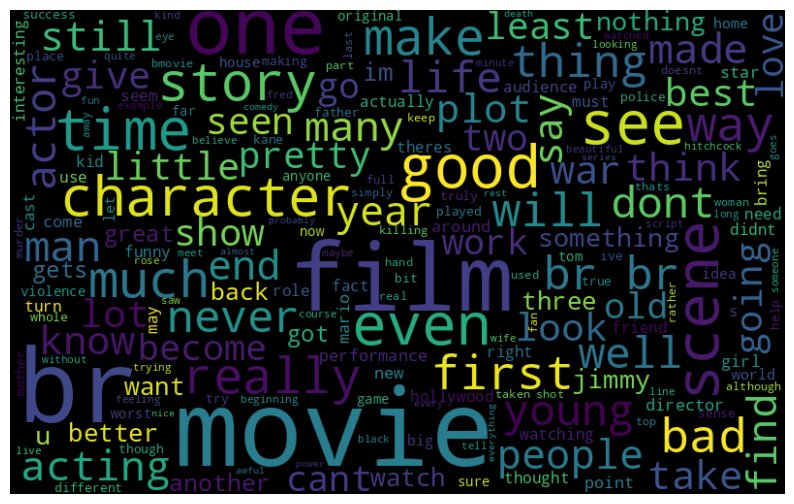

In [ ]:
all_words = ' '.join([text for text in imdb['review']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
label_encoder = LabelEncoder()
imdb["sentiment"] = label_encoder.fit_transform(imdb["sentiment"])

In [ ]:
imdb["sentiment"].value_counts()

0    58
1    42
Name: sentiment, dtype: int64

In [ ]:
# Building a model classification matrix
vectorizer = CountVectorizer()
train_data = vectorizer.fit_transform(imdb['review'])
train_data.shape

(100, 4953)

In [ ]:
y1=imdb['sentiment']
X1_train, X1_test, y1_train, y1_test = train_test_split(train_data, y1, test_size=0.2, random_state=42, stratify=y1)

In [ ]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=10).fit(X1_train, y1_train)
prediction = xgb_model.predict(X1_test)
f1_score(y1_test, prediction)

0.6

In [ ]:
def predict(new_sentence):
  new_sentence = vectorizer.transform(new_sentence)
  prediction = xgb_model.predict(new_sentence)
  if prediction[0] == 0:
      sentiment = "Positive"
  else:
      sentiment = "Negative"

  print(f"Sentence sentiment: {sentiment}")
  print(f"Probability: {xgb_model.predict_proba(new_sentence)}")

In [ ]:
new_sentence = ["Machine learning is awesome"]
predict(new_sentence)

Sentence sentiment: Positive
Probability: [[0.52114856 0.47885147]]


In [ ]:
new_sentence = ["covid did not killed a lot of peaple"]
predict(new_sentence)

Sentence sentiment: Positive
Probability: [[0.60366607 0.39633396]]


In [ ]:
# !pip install lime

In [ ]:
def pred_fn(text):
    text_transformed = vectorizer.transform(text)
    return xgb_model.predict_proba(text_transformed)

In [ ]:
from lime.lime_text import LimeTextExplainer
text_explainer = LimeTextExplainer(class_names=[0, 1])
text = "Machine learning is awesome"
explanation = text_explainer.explain_instance(text, classifier_fn=pred_fn)
explanation.show_in_notebook()

In [ ]:
X_train[0]

array([0.09692839, 0.25769361, 0.10365559, 0.04538706, 0.48722578,
       0.37396479, 0.73336457, 0.21744533, 0.53080808, 0.64237574,
       0.07818215, 0.18427334, 0.05314988, 0.02029892, 0.26637658,
       0.62943491, 0.76717172, 0.62928585, 0.47965329, 0.29933115,
       0.08466738, 0.28331557, 0.07515315, 0.03428529, 0.50868388,
       0.39701759, 1.        , 0.60137457, 0.52493594, 0.40968123])

### Lime

local interpretable model-agnostic explanations, is a technique that approximates any black box machine learning model with a local, interpretable model to explain each individual prediction.

https://christophm.github.io/interpretable-ml-book/lime.html

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
tabular_explainer = LimeTabularExplainer(X_train, mode="classification",
                                              class_names=["0","1"],
                                              feature_names=breast_cance.columns,
                                             )
tabular_explanation = tabular_explainer.explain_instance(X_train[0], adaboosting.predict_proba)
print(y[0])
tabular_explanation.show_in_notebook()

0


# Practice


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
# Load a dataset

# dataset = https://www.kaggle.com/gargmanas/pima-indians-diabetes

file_path = '/content/drive/MyDrive/ColabNotebooks/diabetes.csv'
data = pd.read_csv(file_path)
X = data.drop("Outcome",axis="columns")
y = data.Outcome

In [ ]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
# Check if the dataset has nan value, if yes, impute nan values (KNNImputer)
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

In [ ]:
# select bagging and boosting classifier (2 models) and train them on the same dataset. Make sure you perform hyperparameter Tuning for both of them


In [ ]:
# Bagging
bagging_classifier = BaggingClassifier(DecisionTreeClassifier(random_state=123), random_state=10)

In [ ]:
bagging_params = {
    'n_estimators': [5, 50, 100, 500],
    'max_samples': [0.02, 0.2, 0.7, 0.8],
    'max_features': [0.5, 0.7, 5.0 , 10.0],
}
bagging_clf = GridSearchCV(bagging_classifier, bagging_params, cv=5, scoring='accuracy')
bagging_clf.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=123),
                                         random_state=10),
             param_grid={'max_features': [0.5, 0.7, 5.0, 10.0],
                         'max_samples': [0.02, 0.2, 0.7, 0.8],
                         'n_estimators': [5, 50, 100, 500]},
             scoring='accuracy')

In [ ]:
best_bagging_clf = bagging_clf.best_estimator_
best_bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=123),
                  max_features=0.7, max_samples=0.2, n_estimators=100,
                  random_state=10)

In [ ]:
# Show your result

#Bagging Result

print("Best Parameters for Bagging Classifier:")
print(bagging_clf.best_params_)

bagging_acc = accuracy_score(y_test, best_bagging_clf.predict(X_test))
print(f"Bagging Classifier Accuracy: {bagging_acc}")

Best Parameters for Bagging Classifier:
{'max_features': 0.7, 'max_samples': 0.2, 'n_estimators': 100}
Bagging Classifier Accuracy: 0.8051948051948052


In [ ]:
# Boosting

boost_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state = 10), random_state=42)

In [ ]:
boost_param = {
    'n_estimators': [5, 15, 50, 100, 500],
    'learning_rate': [0.01, 0.02, 0.1, 0.5],
}
boost_clf = GridSearchCV(boost_classifier, boost_param, cv=3, scoring='accuracy')
boost_clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                                           random_state=10),
                                          random_state=42),
             param_grid={'learning_rate': [0.01, 0.02, 0.1, 0.5],
                         'n_estimators': [5, 15, 50, 100, 500]},
             scoring='accuracy')

In [ ]:
best_boost_clf = boost_clf.best_estimator_
best_boost_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=10),
                   learning_rate=0.02, n_estimators=100, random_state=42)

In [ ]:
# Show your result

# Boosting Result

print("Best Parameters for AdaBoost Classifier:")
print(boost_clf.best_params_)

boost_accuracy = accuracy_score(y_test, boost_clf.predict(X_test))
print(f"AdaBoost Classifier Accuracy: {boost_accuracy}")

Best Parameters for AdaBoost Classifier:
{'learning_rate': 0.02, 'n_estimators': 100}
AdaBoost Classifier Accuracy: 0.8008658008658008


In [ ]:
# Show your result

print("Best Parameters for Bagging Classifier:")
print(bagging_clf.best_params_)

bagging_acc = accuracy_score(y_test, best_bagging_clf.predict(X_test))
print(f"Bagging Classifier Accuracy: {bagging_acc}")

print("Best Parameters for AdaBoost Classifier:")
print(boost_clf.best_params_)

boost_accuracy = accuracy_score(y_test, boost_clf.predict(X_test))
print(f"AdaBoost Classifier Accuracy: {boost_accuracy}")

Best Parameters for Bagging Classifier:
{'max_features': 0.7, 'max_samples': 0.2, 'n_estimators': 100}
Bagging Classifier Accuracy: 0.8051948051948052
Best Parameters for AdaBoost Classifier:
{'learning_rate': 0.02, 'n_estimators': 100}
AdaBoost Classifier Accuracy: 0.8008658008658008


### Explain your understanding of today's activity in 200 words


The dataset taken is to predict Pima Indians Diabetes.
First, we make sure that our data do not have any null values.
For the above model, there are no null values.
If there were null values we need to handle them.
We have used a decision tree classifier to train a stand-alone model.
We have used 2 classifiers which is bagging and boosting.

Bagging is an ensemble learning, machine learning technique that combines the predictions of different models to improve accuracy.
It involves creating subsets from an original dataset by randomly selecting the samples. Bagging reduces overfitting and increase the model stability.

Boosting is also an ensemble learning technique that combines weak models. It is used to improve efficiency,
improve accuracy and Curbs over-fitting. It works with the principle of Boosting algorithm.

For the base classifier, we use the Decision Tree classifier for bagging.
To optimize the model further we use different hyperparameters.
The models are been trained on different hyper parameter values to get more accurate results.

The hyperparameter which gives the best results are printed for both bagging and boosting.

Next we fit the model with the best hyperparameters to get the accuracy of the model for bagging and boosting.
For both bagging the model accuracy is 80.5% and for boosting the best accuracy is 80%